# Auditory Sound Processing - Part IV: Simulation of Cochlear Implants

In [1]:
# Standard packages
import numpy as np
import os

# Special imports
from IPython.display import Audio

cur_dir = r'.'
audio_dir = './data/sounds'
os.chdir(cur_dir)

%matplotlib inline

## Gammatones -> Stimulation Intensity

The output of one channnel of Gammatone filters corresponds to the movement of the basilar membrane at the corresponding location. In order to obtain the energy in that movement, the Parseval-Theorem can be applied:


\begin{equation}
    \int_{ - \infty }^\infty  {{{\left| {F(\omega )} \right|}^2}d\omega }  = \int_{ - \infty }^\infty  {{{\left| {f(t)} \right|}^2}dt}
\end{equation}

And since we have discrete time samples, the stimulation amplitude is proportional to

\begin{equation}
    Stim\, \approx \,\sum {{{\left| {f({t_i})} \right|}^2}}
\end{equation}

where *f(t)* is the movement of the basilar membrane.

**Note**: the function *GammaToneApply* in the GammaTone toolbox produces the output of *numElectrode* channels, corresponding to *numElectrode* linearly spaced electrode locations!

## Single Tone

<img src='data/images/MedEl_electrode.jpg' style="width: 1000px;"/>

Stimulation of a single electrode elicits (approximately) the perception of a single tone:

In [2]:
# Create a 1-sec time vector
rate = 44010  # [Hz]
dt = 1./rate
duration = 1  # [sec]
t = np.arange(0, duration, dt)

# Create a single-frequency tone
amp = 1
freq = 400  # [Hz]
single_tone = amp * np.sin(2*np.pi * freq * t)

In [4]:
Audio(data=single_tone, rate=rate, autoplay=False)

## Complex Tone

Stimulation of many frequencies (here e.g. 3) produces a sound that is the sum of the three tones:

In [5]:
amps = np.r_[0.3, 1, 0.7]
freqs = np.c_[[300, 400, 1000]]

# The following construct uses "broadcasting" is a bit complex, but avoids loops
omega = 2 * np.pi * freqs
complex_tone = amps @ np.sin(omega * t)

In [6]:
(omega*t).shape

(3, 44010)

You find more information on row-vectors, column-vectors, and "broadcasting" in
[Soundproc_4b_EfficientCoding.ipynb](Soundproc_4b_EfficientCoding.ipynb)

(0.0, 0.02)

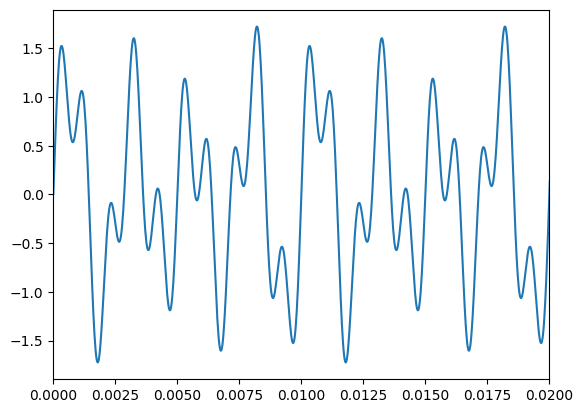

In [11]:
plt.plot(t, complex_tone)
plt.xlim(0, 0.02)

In [12]:
Audio(data=complex_tone, rate=rate, autoplay=False)

## Time Dependence

Since we don't want to hear the same thing all the time, we now have to apply this behavior to every time-window. For starters, it is best to begin with non-overlapping windows (i.e. $timewindow = \Delta t$).

<img src='data/images/sound.png' style="width: 500px;"/>

**Note**: Since the resulting output is typically quite large, one can speed up the code significantly by pre-allocating the memory for the output! I like to start out with an *nan*-array, so I can check later if I have correctly filled up the whole array.

In [13]:
input = complex_tone
output = np.nan * np.ones_like(input)

[Soundproc_3_LinearFilters.ipynb](Soundproc_3_LinearFilters.ipynb)<img src="data/images/Forward_Backward.png" align="middle"> [Soundproc_4b_EfficientCoding.ipynb](Soundproc_4b_EfficientCoding.ipynb)

    Author: Thomas Haslwanter
    Date: Oct-17, 2023

<img src="data/images/CCA_40.png">

*Auditory Sound Processing*  is licensed under a Creative Commons Attribution 4.0 International License.